In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as lin
import scipy.signal as sig
from PIL import Image
import glob
import matplotlib.cm as cm
import itertools

In [60]:
########### Load Input ############################################################################################################################
# In this script I used the brightness to determine structures, instead of one RGB color:
# this is determined by: 0.2126*R + 0.7152*G + 0.0722*B
# Source: https://en.wikipedia.org/wiki/Relative_luminance

patchSize=40 # patchsize this must be 48 since our network can only handle this value

Amount_data= len(glob.glob('City/C*'))
dataPatchedF=[]
for k in range (0, Amount_data):
    name="City/C%d.png" % (k+1)
    img = Image.open(name)
    data=img.convert('RGB')
    data= np.asarray( data, dtype="int32" )
    data=0.2126*data[:,:,0]+0.7152*data[:,:,1]+0.0722*data[:,:,2]
    Yamount=data.shape[0]/patchSize # Counts how many times the windowsize fits in the picture
    Xamount=data.shape[1]/patchSize # Counts how many times the windowsize fits in the picture
    dataPatchedF.append(np.array([[data[j*(patchSize/2):(j+2)*(patchSize/2),i*(patchSize/2):(i+2)*(patchSize/2)] for i in range(0,2*Xamount-1)] for j in range(0,2*Yamount-1)]))


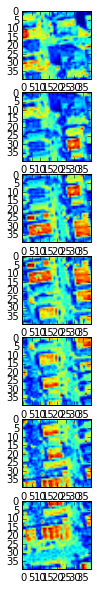

In [64]:
amountx=7
plt.figure(figsize=(10,10))
for i in range(0,amountx):
    plt.subplot(amountx,1,i+1)
    plt.imshow(dataPatchedF[0][i][0])

In [43]:
dataPatchedF[0][0][0].shape

(40L, 40L)